In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['figure.dpi'] = 125

In [ ]:
data = pd.read_csv('demand_weather_date_daily.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     4970 non-null   object 
 1   Operational Demand (MW)  4970 non-null   float64
 2   Transpiration            4970 non-null   object 
 3   Rain                     4970 non-null   object 
 4   Evaporation              4970 non-null   object 
 5   Max Temp                 4970 non-null   object 
 6   Min Temp                 4970 non-null   object 
 7   Max Hum                  4970 non-null   object 
 8   Min Hum                  4970 non-null   object 
 9   Av Wind                  4970 non-null   object 
 10  Solar Rad                4970 non-null   object 
 11  Year                     4970 non-null   int64  
 12  month                    4970 non-null   int64  
 13  Day_of_week              4970 non-null   int64  
 14  Day_of_month            

In [ ]:
data =data.dropna()

In [ ]:
data.head()

,Date,Operational Demand (MW),Transpiration,Rain,Evaporation,Max Temp,Min Temp,Max Hum,Min Hum,Av Wind,Solar Rad,Year,month,Day_of_week,Day_of_month,Day_of_year,week_of_year,state_holiday,mnth_sin,mnth_cos
0,2009-01-01,2543.140,11.2,0.0,11.6,37.2,18.8,65,20,6.1,34.01,2009,1,3,1,1,1,True,0.0,1.0
1,2009-01-02,2893.868,10.2,0.0,12.8,36.1,21.9,70,25,5.31,34.25,2009,1,4,2,2,1,False,0.0,1.0
2,2009-01-03,2450.920,9.4,0.0,11.8,34.4,20.3,79,29,5.45,34.11,2009,1,5,3,3,1,False,0.0,1.0
3,2009-01-04,2526.302,10.5,0.0,11.2,36.5,18.5,62,20,5.25,34.05,2009,1,6,4,4,1,False,0.0,1.0
4,2009-01-05,3106.014,11.9,0.0,11.4,37.2,21.8,63,17,6.77,34.18,2009,1,0,5,5,2,False,0.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4970 entries, 0 to 4969
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     4970 non-null   object 
 1   Operational Demand (MW)  4970 non-null   float64
 2   Transpiration            4970 non-null   object 
 3   Rain                     4970 non-null   object 
 4   Evaporation              4970 non-null   object 
 5   Max Temp                 4970 non-null   object 
 6   Min Temp                 4970 non-null   object 
 7   Max Hum                  4970 non-null   object 
 8   Min Hum                  4970 non-null   object 
 9   Av Wind                  4970 non-null   object 
 10  Solar Rad                4970 non-null   object 
 11  Year                     4970 non-null   int64  
 12  month                    4970 non-null   int64  
 13  Day_of_week              4970 non-null   int64  
 14  Day_of_month            

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class CyclicalToCycle(BaseEstimator, TransformerMixin):
    """ A transformer that returns the sin and cosine values of a cyclical sequence
    For more information regarding how to build your own transformer, read more
    in the :ref:`User Guide <user_guide>`.
    Parameters
    ----------
    demo_param : str, default='demo'
        A parameter used for demonstation of how to pass and store paramters.
    Attributes
    ----------
    n_features_ : int
        The number of features of the data passed to :meth:`fit`.
    """
    def __init__(self, cycle_name='time_of_day', periods_per_cycle=24):
        self.cycle_name=cycle_name
        self.periods_per_cycle= periods_per_cycle

    def fit(self, X, y=None):
        """A reference implementation of a fitting function for a transformer.
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape (n_samples, n_features)
            The training input samples.
        y : None
            There is no need of a target in a transformer, yet the pipeline API
            requires this parameter.
        Returns
        -------
        self : object
            Returns self.
        """
        return self

    def transform(self, X):
        """ A reference implementation of a transform function.
        Parameters
        ----------
        X : {array-like, sparse-matrix}, shape (n_samples, n_features)
            The input samples.
        Returns
        -------
        X_transformed : array, shape (n_samples, n_features)
            The array containing the element-wise square roots of the values
            in ``X``.
        """
        X = X.copy(deep=True)
        X['sin_' + self.cycle_name] = np.sin(2*np.pi*X[self.cycle_name] / self.periods_per_cycle)
        X['cos_' + self.cycle_name] = np.cos(2*np.pi*X[self.cycle_name] / self.periods_per_cycle)
        X.drop([self.cycle_name], axis=1, inplace=True)
        
        return X

In [ ]:
del data['mnth_sin']
del data  [	'mnth_cos']

In [ ]:
cycler = CyclicalToCycle(cycle_name='month', periods_per_cycle=12)
cycler.fit(data)
Xt = cycler.transform(data)

cycler = CyclicalToCycle(cycle_name='Day_of_week', periods_per_cycle=7)
cycler.fit(Xt)
Xt = cycler.transform(Xt)

cycler = CyclicalToCycle(cycle_name='Day_of_month', periods_per_cycle=30)
cycler.fit(Xt)
Xt = cycler.transform(Xt)

cycler = CyclicalToCycle(cycle_name='Day_of_year', periods_per_cycle=365)
cycler.fit(Xt)
Xt = cycler.transform(Xt)

cycler = CyclicalToCycle(cycle_name='week_of_year', periods_per_cycle=52)
cycler.fit(Xt)
Xt = cycler.transform(Xt)

In [ ]:
Xt['Date'] = pd.to_datetime(Xt['Date'], errors='coerce')
Xt['weekday'] = (df.index.weekday < 5).astype(int)
Xt.set_index('Date', inplace=True)
Xt = Xt.apply(pd.to_numeric, errors='coerce')
Xt= Xt.sort_index()
Xt.head(10)


,Operational Demand (MW),Transpiration,Rain,Evaporation,Max Temp,Min Temp,Max Hum,Min Hum,Av Wind,Solar Rad,...,sin_month,cos_month,sin_Day_of_week,cos_Day_of_week,sin_Day_of_month,cos_Day_of_month,sin_Day_of_year,cos_Day_of_year,sin_week_of_year,cos_week_of_year
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,2543.140,11.2,0.0,11.6,37.2,18.8,65.0,20.0,6.10,34.01,...,0.5,0.866025,0.433884,-0.900969,0.207912,0.978148,0.017213,0.999852,0.120537,0.992709
2009-01-02,2893.868,10.2,0.0,12.8,36.1,21.9,70.0,25.0,5.31,34.25,...,0.5,0.866025,-0.433884,-0.900969,0.406737,0.913545,0.034422,0.999407,0.120537,0.992709
2009-01-03,2450.920,9.4,0.0,11.8,34.4,20.3,79.0,29.0,5.45,34.11,...,0.5,0.866025,-0.974928,-0.222521,0.587785,0.809017,0.051620,0.998667,0.120537,0.992709
2009-01-04,2526.302,10.5,0.0,11.2,36.5,18.5,62.0,20.0,5.25,34.05,...,0.5,0.866025,-0.781831,0.623490,0.743145,0.669131,0.068802,0.997630,0.120537,0.992709
2009-01-05,3106.014,11.9,0.0,11.4,37.2,21.8,63.0,17.0,6.77,34.18,...,0.5,0.866025,0.000000,1.000000,0.866025,0.500000,0.085965,0.996298,0.239316,0.970942
2009-01-06,3019.166,10.1,0.0,12.0,36.4,19.7,73.0,26.0,5.42,33.82,...,0.5,0.866025,0.781831,0.623490,0.951057,0.309017,0.103102,0.994671,0.239316,0.970942
2009-01-07,3022.304,10.7,0.0,12.0,36.3,18.9,63.0,21.0,5.83,33.85,...,0.5,0.866025,0.974928,-0.222521,0.994522,0.104528,0.120208,0.992749,0.239316,0.970942
2009-01-08,3075.148,10.5,0.0,10.8,37.2,20.3,60.0,24.0,5.19,33.96,...,0.5,0.866025,0.433884,-0.900969,0.994522,-0.104528,0.137279,0.990532,0.239316,0.970942
2009-01-09,3072.340,10.3,0.0,12.6,37.1,19.1,67.0,27.0,5.28,34.40,...,0.5,0.866025,-0.433884,-0.900969,0.951057,-0.309017,0.154309,0.988023,0.239316,0.970942


Text(0, 0.5, 'Electricity Demand [MW]')

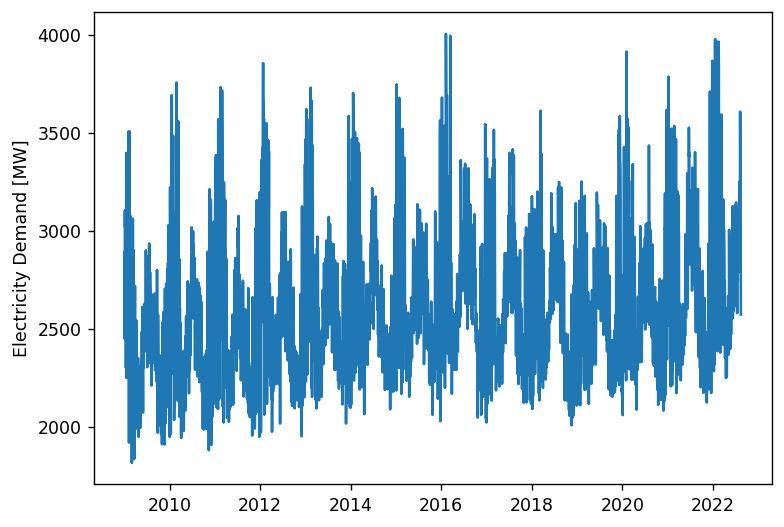

In [ ]:
plt.plot(Xt['Operational Demand (MW)'])
plt.ylabel('Electricity Demand [MW]')

In [ ]:
Xt.head(10)

,Operational Demand (MW),Transpiration,Rain,Evaporation,Max Temp,Min Temp,Max Hum,Min Hum,Av Wind,Solar Rad,...,sin_month,cos_month,sin_Day_of_week,cos_Day_of_week,sin_Day_of_month,cos_Day_of_month,sin_Day_of_year,cos_Day_of_year,sin_week_of_year,cos_week_of_year
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,2543.140,11.2,0.0,11.6,37.2,18.8,65.0,20.0,6.10,34.01,...,0.5,0.866025,0.433884,-0.900969,0.207912,0.978148,0.017213,0.999852,0.120537,0.992709
2009-01-02,2893.868,10.2,0.0,12.8,36.1,21.9,70.0,25.0,5.31,34.25,...,0.5,0.866025,-0.433884,-0.900969,0.406737,0.913545,0.034422,0.999407,0.120537,0.992709
2009-01-03,2450.920,9.4,0.0,11.8,34.4,20.3,79.0,29.0,5.45,34.11,...,0.5,0.866025,-0.974928,-0.222521,0.587785,0.809017,0.051620,0.998667,0.120537,0.992709
2009-01-04,2526.302,10.5,0.0,11.2,36.5,18.5,62.0,20.0,5.25,34.05,...,0.5,0.866025,-0.781831,0.623490,0.743145,0.669131,0.068802,0.997630,0.120537,0.992709
2009-01-05,3106.014,11.9,0.0,11.4,37.2,21.8,63.0,17.0,6.77,34.18,...,0.5,0.866025,0.000000,1.000000,0.866025,0.500000,0.085965,0.996298,0.239316,0.970942
2009-01-06,3019.166,10.1,0.0,12.0,36.4,19.7,73.0,26.0,5.42,33.82,...,0.5,0.866025,0.781831,0.623490,0.951057,0.309017,0.103102,0.994671,0.239316,0.970942
2009-01-07,3022.304,10.7,0.0,12.0,36.3,18.9,63.0,21.0,5.83,33.85,...,0.5,0.866025,0.974928,-0.222521,0.994522,0.104528,0.120208,0.992749,0.239316,0.970942
2009-01-08,3075.148,10.5,0.0,10.8,37.2,20.3,60.0,24.0,5.19,33.96,...,0.5,0.866025,0.433884,-0.900969,0.994522,-0.104528,0.137279,0.990532,0.239316,0.970942
2009-01-09,3072.340,10.3,0.0,12.6,37.1,19.1,67.0,27.0,5.28,34.40,...,0.5,0.866025,-0.433884,-0.900969,0.951057,-0.309017,0.154309,0.988023,0.239316,0.970942


In [ ]:
Xt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4970 entries, 2009-01-01 to 2022-08-15
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Operational Demand (MW)  4970 non-null   float64
 1   Transpiration            4928 non-null   float64
 2   Rain                     4964 non-null   float64
 3   Evaporation              4956 non-null   float64
 4   Max Temp                 4969 non-null   float64
 5   Min Temp                 4968 non-null   float64
 6   Max Hum                  4969 non-null   float64
 7   Min Hum                  4969 non-null   float64
 8   Av Wind                  4969 non-null   float64
 9   Solar Rad                4932 non-null   float64
 10  Year                     4970 non-null   int64  
 11  state_holiday            4970 non-null   bool   
 12  sin_month                4970 non-null   float64
 13  cos_month                4970 non-null   float64
 14  sin_Da

In [ ]:
del Xt['Year']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
Xt= Xt.sort_index()
Xt_untrans2= Xt.copy()
#Xt[['Operational Demand (MW)']] = scaler.fit_transform(Xt[['Operational Demand (MW)']])
Xt[['Transpiration']] = scaler.fit_transform(Xt[['Transpiration']])
Xt[['Rain']] = scaler.fit_transform(Xt[['Rain']])
Xt[['Max Temp']] = scaler.fit_transform(Xt[['Max Temp']])
Xt[['Min Temp ']] = scaler.fit_transform(Xt[['Min Temp']])
Xt[['Max Hum']] = scaler.fit_transform(Xt[['Max Hum']])
Xt[['Av Wind']] = scaler.fit_transform(Xt[['Av Wind']])
Xt[['Solar Rad ']] = scaler.fit_transform(Xt[['Solar Rad']])

load_min, load_max = Xt['Operational Demand (MW)'].min(), Xt['Operational Demand (MW)'].max()

Xt['Operational Demand (MW)'] = (Xt['Operational Demand (MW)'] - load_min) / (load_max - load_min)

In [ ]:
Xt.head(10)

,Operational Demand (MW),Transpiration,Rain,Evaporation,Max Temp,Min Temp,Max Hum,Min Hum,Av Wind,Solar Rad,...,sin_Day_of_week,cos_Day_of_week,sin_Day_of_month,cos_Day_of_month,sin_Day_of_year,cos_Day_of_year,sin_week_of_year,cos_week_of_year,Min Temp,Solar Rad
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,0.331301,0.677632,0.0,11.6,0.781931,18.8,0.545455,20.0,0.444860,34.01,...,0.433884,-0.900969,0.207912,0.978148,0.017213,0.999852,0.120537,0.992709,0.668919,0.868684
2009-01-02,0.491635,0.611842,0.0,12.8,0.747664,21.9,0.610390,25.0,0.371028,34.25,...,-0.433884,-0.900969,0.406737,0.913545,0.034422,0.999407,0.120537,0.992709,0.773649,0.875000
2009-01-03,0.289143,0.559211,0.0,11.8,0.694704,20.3,0.727273,29.0,0.384112,34.11,...,-0.974928,-0.222521,0.587785,0.809017,0.051620,0.998667,0.120537,0.992709,0.719595,0.871316
2009-01-04,0.323604,0.631579,0.0,11.2,0.760125,18.5,0.506494,20.0,0.365421,34.05,...,-0.781831,0.623490,0.743145,0.669131,0.068802,0.997630,0.120537,0.992709,0.658784,0.869737
2009-01-05,0.588617,0.723684,0.0,11.4,0.781931,21.8,0.519481,17.0,0.507477,34.18,...,0.000000,1.000000,0.866025,0.500000,0.085965,0.996298,0.239316,0.970942,0.770270,0.873158
2009-01-06,0.548915,0.605263,0.0,12.0,0.757009,19.7,0.649351,26.0,0.381308,33.82,...,0.781831,0.623490,0.951057,0.309017,0.103102,0.994671,0.239316,0.970942,0.699324,0.863684
2009-01-07,0.550349,0.644737,0.0,12.0,0.753894,18.9,0.519481,21.0,0.419626,33.85,...,0.974928,-0.222521,0.994522,0.104528,0.120208,0.992749,0.239316,0.970942,0.672297,0.864474
2009-01-08,0.574507,0.631579,0.0,10.8,0.781931,20.3,0.480519,24.0,0.359813,33.96,...,0.433884,-0.900969,0.994522,-0.104528,0.137279,0.990532,0.239316,0.970942,0.719595,0.867368
2009-01-09,0.573223,0.618421,0.0,12.6,0.778816,19.1,0.571429,27.0,0.368224,34.40,...,-0.433884,-0.900969,0.951057,-0.309017,0.154309,0.988023,0.239316,0.970942,0.679054,0.878947


In [ ]:
Xt.isna().any()

Operational Demand (MW)    False
Transpiration               True
Rain                        True
Evaporation                 True
Max Temp                    True
Min Temp                    True
Max Hum                     True
Min Hum                     True
Av Wind                     True
Solar Rad                   True
state_holiday              False
sin_month                  False
cos_month                  False
sin_Day_of_week            False
cos_Day_of_week            False
sin_Day_of_month           False
cos_Day_of_month           False
sin_Day_of_year            False
cos_Day_of_year            False
sin_week_of_year           False
cos_week_of_year           False
Min Temp                    True
Solar Rad                   True
dtype: bool

In [ ]:
Xt= Xt.sort_index()

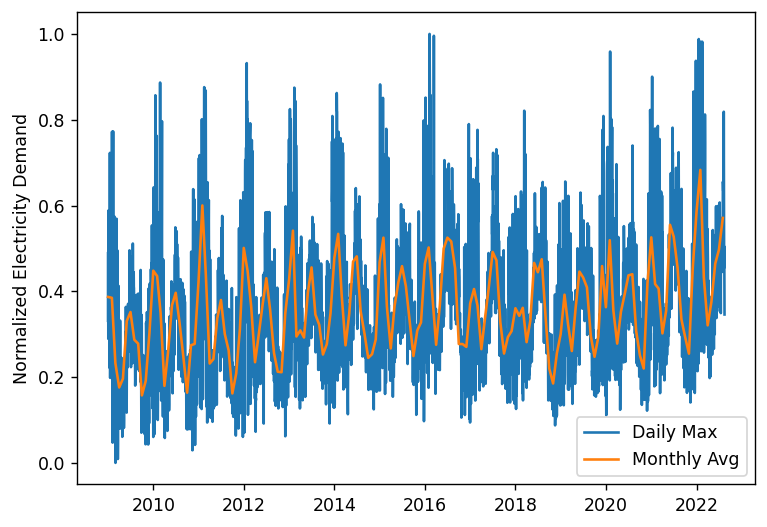

In [ ]:
monthly_norm = Xt['Operational Demand (MW)'].resample('MS').mean().bfill()
plt.plot(Xt['Operational Demand (MW)'], label='Daily Max')
plt.plot(monthly_norm, label='Monthly Avg')
plt.ylabel('Normalized Electricity Demand')
plt.legend();

In [ ]:
train = monthly_norm[:'2019']
validate = monthly_norm['2020':'2021']
test = monthly_norm['2022':]

In [ ]:
train.head()

Date
2009-01-01    0.386821
2009-02-01    0.384796
2009-03-01    0.232908
2009-04-01    0.175900
2009-05-01    0.196271
Freq: MS, Name: Operational Demand (MW), dtype: float64

In [ ]:
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

# train SARIMA model and get validation set performance
def get_sarima_mae(y_tr, hp, y_te):
    try:
        model = SARIMAX(y_tr, order=(hp[0],hp[1],hp[2]), seasonal_order=(hp[3],hp[4],hp[5],12)).fit()
        y_hat = model.get_forecast(steps=len(y_te)).predicted_mean
        return np.mean(np.abs(y_hat - y_te))
    except:
        return None

# define potential SARIMA hyerparameters
p = d = q = P = D = Q = range(2)
hp_list = list(product(p,d,q,P,D,Q))
grid_search = pd.DataFrame(columns=['p','d','q','P','D','Q','mae'])

# perform grid search
for i, hp in enumerate(hp_list):
    mae = get_sarima_mae(train, hp, validate)
    if mae != None:
        params = {'p':hp[0], 'd':hp[1], 'q':hp[2], 'P':hp[3], 'D':hp[4], 'Q':hp[5], 'mae':mae}
        grid_search = grid_search.append(params, ignore_index=True)

# display best performing hyperparamters
grid_search.sort_values('mae').head(1)

,p,d,q,P,D,Q,mae
59,1.0,1.0,1.0,0.0,1.0,1.0,0.038268


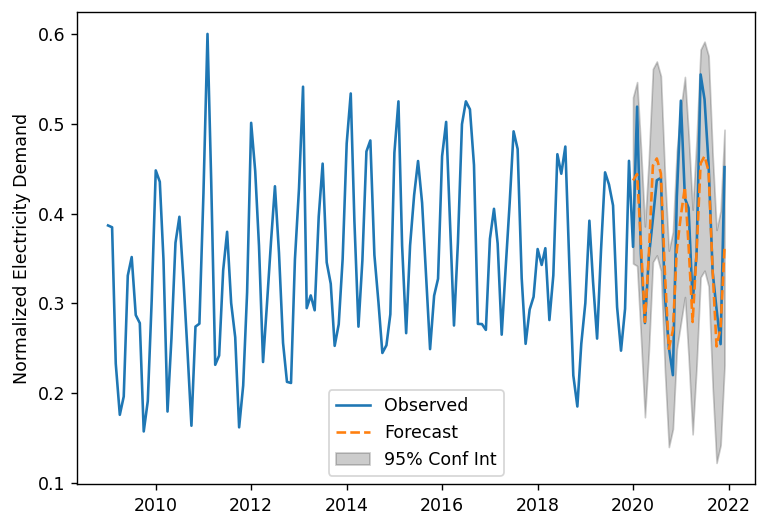

In [ ]:
# best hyperparameters from grid search
best_monthly_order = (1,1,1)
best_monthly_seas_order = (0,1,1,12)

# fit SARIMA model
model_m = SARIMAX(train, order=best_monthly_order, seasonal_order=best_monthly_seas_order).fit()

# get forecast and confidence interval for forecast
forecast = model_m.get_forecast(steps=len(validate))
pred = pd.Series(forecast.predicted_mean, index=validate.index)
ci = forecast.conf_int(alpha=0.05)

# plotting
plt.plot(monthly_norm[:'2021'], label='Observed')
plt.plot(pred, label='Forecast', ls='--')
plt.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1],
                 color='k', alpha=0.2, label='95% Conf Int')
plt.ylabel('Normalized Electricity Demand')
plt.legend();

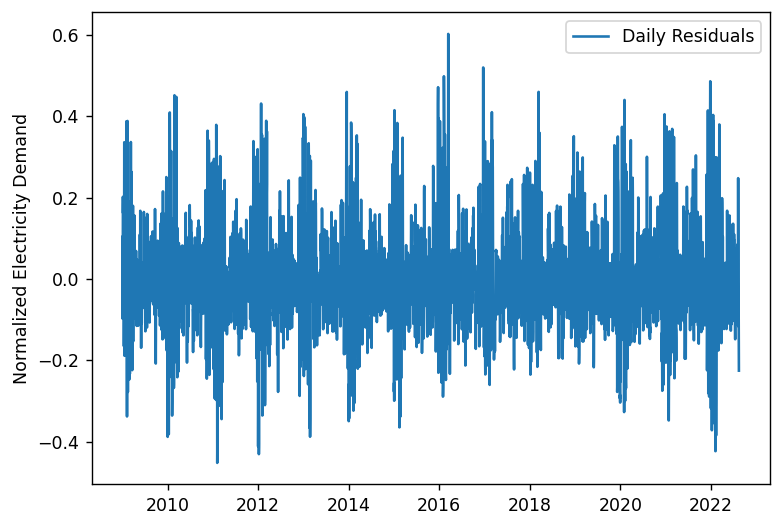

In [ ]:
daily_res_norm = Xt.copy()
daily_res_norm['Operational Demand (MW)'] = Xt['Operational Demand (MW)'].groupby(pd.Grouper(freq='M')).transform(lambda x: x - x.mean())
plt.plot(daily_res_norm['Operational Demand (MW)'], label='Daily Residuals')
plt.ylabel('Normalized Electricity Demand')
plt.legend();

In [ ]:
# train-validate-test split
train = daily_res_norm[:'2021-11-30']
validate = daily_res_norm['2021-12-01':'2022-03-01']
test = daily_res_norm['2021-12-01':'2022-03-01']

# setup training variables 
exog_tr = train.iloc[:,1:].values
ar_tr = train['Operational Demand (MW)'].shift().bfill().values[:,None]
X_tr = np.hstack([ar_tr, exog_tr])
y_tr = train['Operational Demand (MW)'].values

# setup validation variables
exog_val = validate.iloc[:,1:].values
y_val = validate['Operational Demand (MW)'].values

# setup testing variables
exog_te = test.iloc[:,1:].values

# setup miscellaneous variables
yp_full = daily_res_norm.loc['2021-12-01':'2022-03-01','Operational Demand (MW)']
yp_val = daily_res_norm.loc['2021-12-01':'2022-03-01','Operational Demand (MW)']
yp_te = daily_res_norm.loc['2022':,'Operational Demand (MW)']
y_init_val = np.hstack([y_tr[-1], validate.iloc[7::7,0].values])
y_init_te = np.hstack([y_val[-1], test.iloc[7::7,0].values])

In [ ]:
def compute_mae(y, yhat):
    """given predicted and observed values, computes mean absolute error"""
    return np.mean(np.abs(yhat - y))

def forecast(model, exog, y_init):
    """given a trained model, exogenous features, and initial AR term, makes forecasting predictions"""
    yhat = []
    Xi_te = np.hstack([y_init, exog[0]])[None,:]
    for i in range(len(exog)-1):
        yhat_i = model.predict(Xi_te)[0]
        yhat.append(yhat_i)
        Xi_te = np.hstack([yhat_i, exog[i+1]])[None,:]
    yhat.append(model.predict(Xi_te)[0])
    return np.array(yhat)

def weekly_forecast(model, exog, y_init):
    """given a trained model exogenous features, and initial AR term, makes a series of 1-week-out forecasts"""
    yhat = []
    for i, yi in enumerate(y_init):
        exog_i = exog[7*i:7*(i+1),:]
        if exog_i.shape[0] < 1:
            break
        yhat.append(forecast(model, exog_i, yi))
    return np.hstack(yhat)

def plot_full(y, yhat, yhat_idx):
    """plots observed and forecasted values for the full date range"""
    pred = pd.Series(yhat, index=yhat_idx)
    plt.figure()
    plt.plot(y, label='Observed')
    plt.plot(pred, label='Forecast', ls='--')
    plt.ylabel('Normalized Daily Residual Electricity Demand')
    plt.legend()
    
def plot_week(y, yhat, yhat_idx):
    """plots observed and forecasted values for one week span"""
    pred = pd.Series(yhat, index=yhat_idx)
    fig = plt.figure();
    plt.plot(y['2021-12-01':'2021-12-31'], label='Observed')
    plt.plot(pred['2021-12-01':'2021-12-31'], label='Forecast', ls='--')
    plt.ylabel('Normalized Daily Residual Electricity Demand')
    plt.legend()
    fig.autofmt_xdate()

In [ ]:
def compute_mape(y, yhat):
    pct_err = ((yhat - y) / y).dropna()
    return np.mean(np.abs(pct_err)) 


In [ ]:
Xt.tail(10)

,Operational Demand (MW),Transpiration,Rain,Evaporation,Max Temp,Min Temp,Max Hum,Min Hum,Av Wind,Solar Rad,...,sin_Day_of_week,cos_Day_of_week,sin_Day_of_month,cos_Day_of_month,sin_Day_of_year,cos_Day_of_year,sin_week_of_year,cos_week_of_year,Min Temp,Solar Rad
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-06,0.458771,0.092105,0.033898,0.8,0.180685,8.2,0.935065,53.0,0.227103,13.33,...,-0.974928,-0.222521,9.510565e-01,0.309017,-0.573772,-0.819015,-0.568065,-0.822984,0.310811,0.324474
2022-08-07,0.480070,0.105263,0.152542,1.4,0.190031,11.6,0.948052,43.0,0.236449,12.79,...,-0.781831,0.623490,9.945219e-01,0.104528,-0.587785,-0.809017,-0.568065,-0.822984,0.425676,0.310263
2022-08-08,0.667486,0.072368,0.002421,2.6,0.109034,8.7,0.909091,51.0,0.330841,3.60,...,0.000000,1.000000,9.945219e-01,-0.104528,-0.601624,-0.798779,-0.663123,-0.748511,0.327703,0.068421
2022-08-09,0.818633,0.032895,0.290557,3.8,0.000000,7.7,0.935065,68.0,0.213084,9.73,...,0.781831,0.623490,9.510565e-01,-0.309017,-0.615285,-0.788305,-0.663123,-0.748511,0.293919,0.229737
2022-08-10,0.618911,0.078947,0.082324,1.4,0.155763,4.4,0.948052,52.0,0.156075,14.82,...,0.974928,-0.222521,8.660254e-01,-0.500000,-0.628763,-0.777597,-0.663123,-0.748511,0.182432,0.363684
2022-08-11,0.568332,0.085526,0.000000,1.4,0.233645,2.8,0.948052,43.0,0.052336,15.30,...,0.433884,-0.900969,7.431448e-01,-0.669131,-0.642055,-0.766659,-0.663123,-0.748511,0.128378,0.376316
2022-08-12,0.454616,0.171053,0.000000,2.0,0.277259,6.0,0.896104,41.0,0.379439,15.42,...,-0.433884,-0.900969,5.877853e-01,-0.809017,-0.655156,-0.755493,-0.663123,-0.748511,0.236486,0.379474
2022-08-13,0.504368,0.131579,0.000000,4.0,0.146417,10.9,0.922078,34.0,0.432710,5.67,...,-0.974928,-0.222521,4.067366e-01,-0.913545,-0.668064,-0.744104,-0.663123,-0.748511,0.402027,0.122895
2022-08-14,0.441931,0.092105,0.196126,1.8,0.230530,7.3,0.948052,47.0,0.119626,13.35,...,-0.781831,0.623490,2.079117e-01,-0.978148,-0.680773,-0.732494,-0.663123,-0.748511,0.280405,0.325000


MAE: 0.22477652438414356


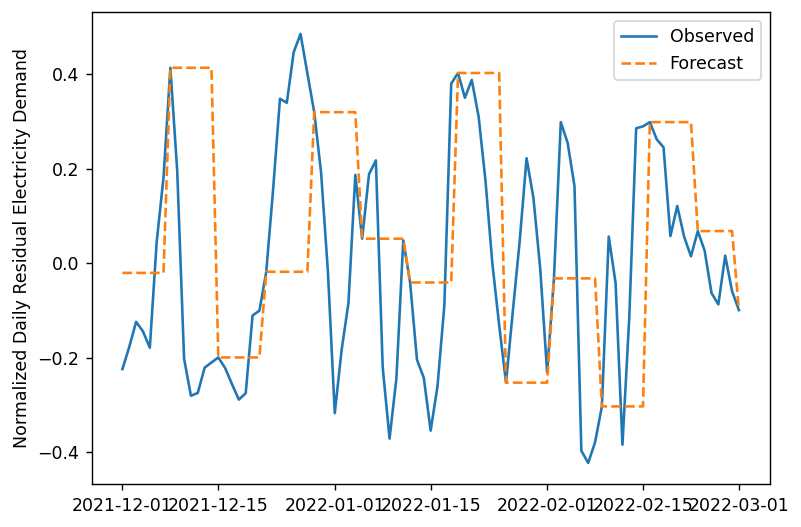

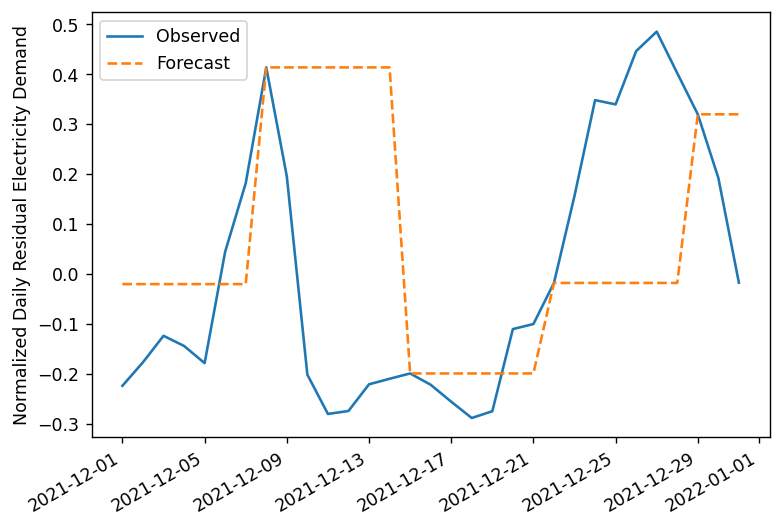

In [ ]:
# get forecast "predictions" from the baseline persistance model
idx = validate.index[::7]
idx = idx.append(pd.DatetimeIndex(['2022-03-01']))
pred = pd.Series(np.hstack([y_init_val, yp_val.iloc[-1]]), index=idx)
pred = pred.resample('D').ffill().values

# compute error, and plot on both long and short time scales
print('MAE:', compute_mae(y_val, pred))
plot_full(yp_full, pred, yp_val.index)
plot_week(yp_full, pred, yp_val.index)

In [ ]:
# monthly average forecasts
train_m = monthly_norm[:'2021-11-30']
test_m = monthly_norm['2021-12-01':'2022-03-01']
model_m = SARIMAX(train_m, order=best_monthly_order, seasonal_order=best_monthly_seas_order).fit()
forecast_m = model_m.get_forecast(steps=len(test_m))
pred_m_norm = pd.Series(forecast_m.predicted_mean, index=test_m.index)

# baseline hourly residual forecasts
idx = test.index[::7]
idx = idx.append(pd.DatetimeIndex(['2022-03-01']))
pred_base = pd.Series(np.hstack([y_init_te, yp_te.iloc[-1]]), index=idx)
pred_base = pred_base.resample('D').ffill().values

In [ ]:
# baseline: combine monthly/hourly forecasts, unnormalize to original scale
m_norm_df = pd.DataFrame({'m_norm':pred_m_norm, 'month':pred_m_norm.index.month, 'year':pred_m_norm.index.year})
bl_norm_df = pd.DataFrame({'h_norm':pred_base, 'month':test.index.month, 'year':test.index.year})
pred_bl_norm_df = bl_norm_df.merge(m_norm_df, on=['month','year'])
pred_bl_norm = pd.Series((pred_bl_norm_df['m_norm'] + pred_bl_norm_df['h_norm']).values, index=test.index)
pred_bl = pred_bl_norm * (load_max - load_min) + load_min

In [ ]:
print("baseline MAPE:", compute_mape(Xt_untrans2['Operational Demand (MW)'], pred_bl))

baseline MAPE: 0.1743925772681173


MAE: 0.10024883420550033


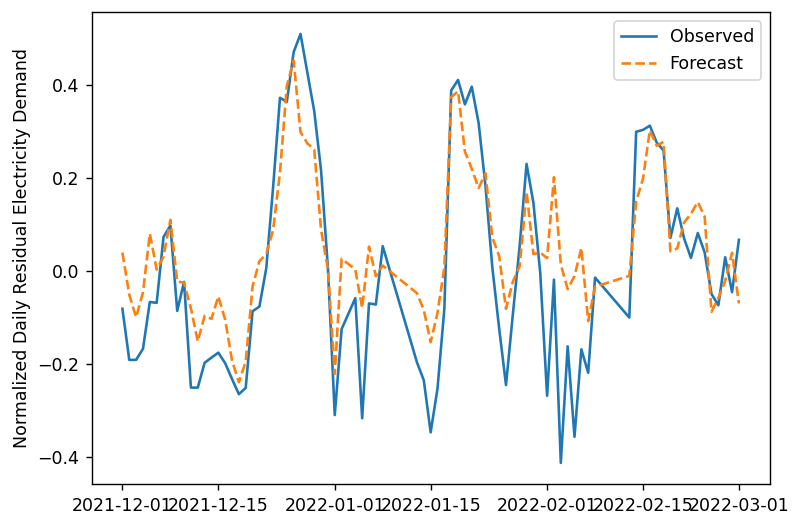

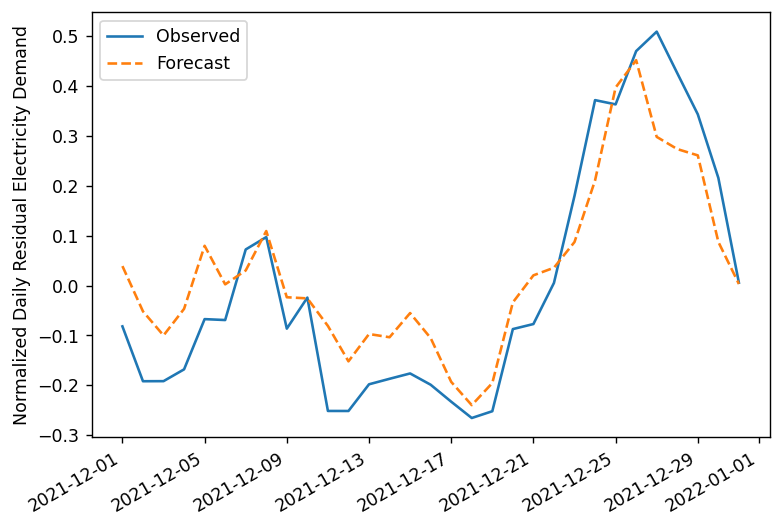

In [ ]:
data = pd.read_csv('demand_weather.csv')
del data['mnth_sin']
del data  [	'mnth_cos']


cycler = CyclicalToCycle(cycle_name='month', periods_per_cycle=12)
cycler.fit(data)
Xt = cycler.transform(data)

cycler = CyclicalToCycle(cycle_name='Day_of_week', periods_per_cycle=7)
cycler.fit(Xt)
Xt = cycler.transform(Xt)

cycler = CyclicalToCycle(cycle_name='Day_of_month', periods_per_cycle=30)
cycler.fit(Xt)
Xt = cycler.transform(Xt)

cycler = CyclicalToCycle(cycle_name='Day_of_year', periods_per_cycle=365)
cycler.fit(Xt)
Xt = cycler.transform(Xt)

cycler = CyclicalToCycle(cycle_name='week_of_year', periods_per_cycle=52)
cycler.fit(Xt)
Xt = cycler.transform(Xt)


Xt['Date'] = pd.to_datetime(Xt['Date'], errors='coerce')
Xt.set_index('Date', inplace=True)
Xt = Xt.apply(pd.to_numeric, errors='coerce')
Xt= Xt.sort_index()
del Xt['Year']
scaler = MinMaxScaler()

Xt_untrans = Xt.copy()
# Xt[['Operational Demand (MW)']] = scaler.fit_transform(Xt[['Operational Demand (MW)']])
Xt[['Transpiration']] = scaler.fit_transform(Xt[['Transpiration']])
Xt[['Rain']] = scaler.fit_transform(Xt[['Rain']])
Xt[['Max Temp']] = scaler.fit_transform(Xt[['Max Temp']])
Xt[['Min Temp ']] = scaler.fit_transform(Xt[['Min Temp']])
Xt[['Max Hum']] = scaler.fit_transform(Xt[['Max Hum']])
Xt[['Av Wind']] = scaler.fit_transform(Xt[['Av Wind']])
Xt[['Solar Rad ']] = scaler.fit_transform(Xt[['Solar Rad']])


load_min, load_max = Xt['Operational Demand (MW)'].min(), Xt['Operational Demand (MW)'].max()

Xt['Operational Demand (MW)'] = (Xt['Operational Demand (MW)'] - load_min) / (load_max - load_min)

monthly_norm = Xt['Operational Demand (MW)'].resample('MS').mean().bfill()

daily_res_norm = Xt.copy()
daily_res_norm['Operational Demand (MW)'] = Xt['Operational Demand (MW)'].groupby(pd.Grouper(freq='M')).transform(lambda x: x - x.mean())



# train-validate-test split
train = daily_res_norm[:'2021-11-30']
validate = daily_res_norm['2021-12-01':'2022-03-01']
test = daily_res_norm['2021-12-01':'2022-03-01']

# setup training variables 
exog_tr = train.iloc[:,1:].values
ar_tr = train['Operational Demand (MW)'].shift().bfill().values[:,None]
X_tr = np.hstack([ar_tr, exog_tr])
y_tr = train['Operational Demand (MW)'].values

# setup validation variables
exog_val = validate.iloc[:,1:].values
y_val = validate['Operational Demand (MW)'].values

# setup testing variables
exog_te = test.iloc[:,1:].values

# setup miscellaneous variables
yp_full = daily_res_norm.loc['2021-12-01':'2022-03-01','Operational Demand (MW)']
yp_val = daily_res_norm.loc['2021-12-01':'2022-03-01','Operational Demand (MW)']
yp_te = daily_res_norm.loc['2022':,'Operational Demand (MW)']
y_init_val = np.hstack([y_tr[-1], validate.iloc[7::7,0].values])
y_init_te = np.hstack([y_val[-1], test.iloc[7::7,0].values])


from sklearn.linear_model import LinearRegression

# train model and get predictions
mod_lr = LinearRegression()
mod_lr.fit(X_tr, y_tr)
pred = weekly_forecast(mod_lr, exog_val, y_init_val)

# compute error, and plot on both long and short time scales
print('MAE:', compute_mae(y_val, pred))
plot_full(yp_full, pred, yp_val.index)
plot_week(yp_full, pred, yp_val.index)

MAE: 0.10024883420550033


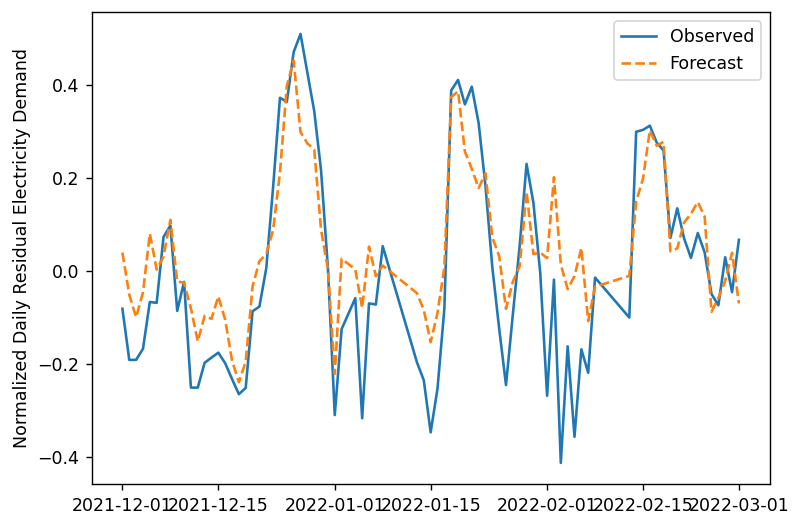

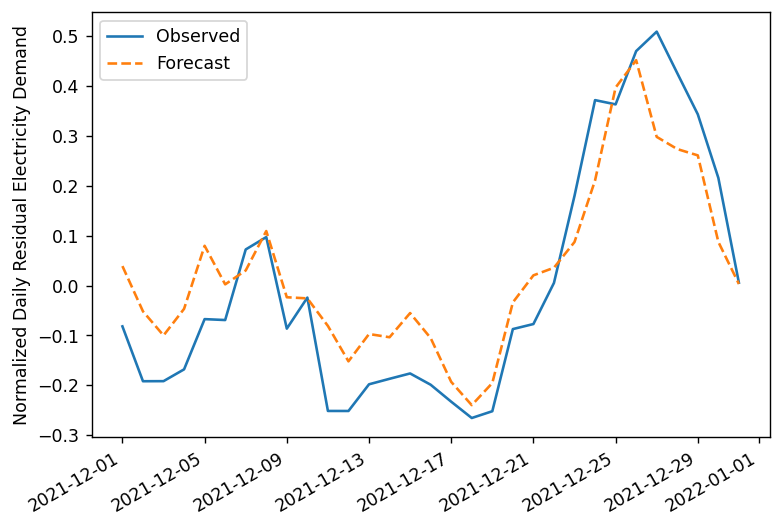

In [ ]:
from sklearn.linear_model import LinearRegression

# train model and get predictions
mod_lr = LinearRegression()
mod_lr.fit(X_tr, y_tr)
pred = weekly_forecast(mod_lr, exog_val, y_init_val)

# compute error, and plot on both long and short time scales
print('MAE:', compute_mae(y_val, pred))
plot_full(yp_full, pred, yp_val.index)
plot_week(yp_full, pred, yp_val.index)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# train GBR model, and get validation set performance
def get_gbr_mae(lr, ne, md):
    mod = GradientBoostingRegressor(learning_rate=lr, n_estimators=ne, max_depth=md)
    mod.fit(X_tr, y_tr)
    pred_val = weekly_forecast(mod, exog_val, y_init_val)
    return compute_mae(y_val, pred_val)

# define potential sets of hyperparameters
learning_rate = [0.01, 0.1, 1.]
n_estimators = [100, 500, 1000]
max_depth = [2, 3, 4]
grid_search = pd.DataFrame(columns=['lr','ne','md','mae'])

# perform grid search
for lr in learning_rate:    
    for ne in n_estimators:        
        for md in max_depth:            
            mae = get_gbr_mae(lr, ne, md)
            params = {'lr':lr, 'ne':ne, 'md':md, 'mae':mae} 
            grid_search = grid_search.append(params, ignore_index=True)

# display best hyperparameters based on grid search
grid_search.sort_values('mae').head(1)

,lr,ne,md,mae
16,0.1,1000.0,3.0,0.090068


MAE: 0.09084407734691963


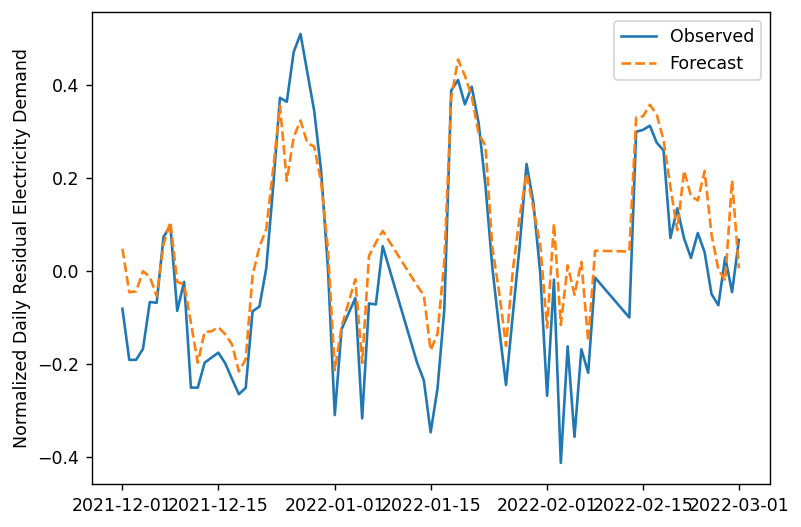

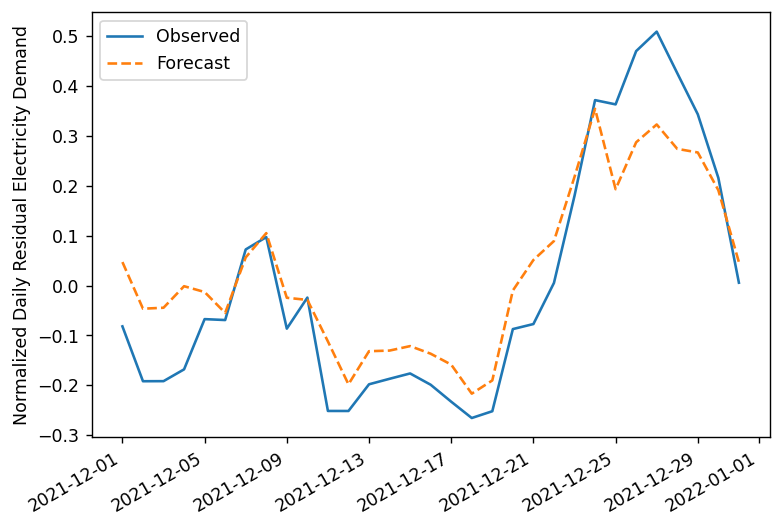

In [ ]:
# best hyperparamters
lr, ne, md = 0.1, 500, 4

# train model and get predictions
mod_gbr = GradientBoostingRegressor(learning_rate=lr, n_estimators=ne, max_depth=md)
mod_gbr.fit(X_tr, y_tr)
pred = weekly_forecast(mod_gbr, exog_val, y_init_val)

# compute error, and plot on both long and short time scales
print('MAE:', compute_mae(y_val, pred))
plot_full(yp_full, pred, yp_val.index)
plot_week(yp_full, pred, yp_val.index)

In [ ]:
from sklearn.neural_network import MLPRegressor

# train MLP model, and get validation set performance
def get_mlp_mae(hl, a, lr, mi):
    mod = MLPRegressor(hidden_layer_sizes=hl, alpha=a, learning_rate_init=lr, max_iter=mi)
    mod.fit(X_tr, y_tr)
    pred_val = weekly_forecast(mod, exog_val, y_init_val)
    return compute_mae(y_val, pred_val)

# define potential sets of hyperparameters
hidden_layer_sizes = [(100,),(500,),(100,10,),(100,100,)]
alpha = [0.0001, 0.00001, 0.001]
learning_rate = [0.0001, 0.001, 0.01]
max_iter = [200, 1000, 10000]
grid_search = pd.DataFrame(columns=['hl','a','lr','mi','mae'])

# perform grid search
for hl in hidden_layer_sizes:    
    for a in alpha:        
        for lr in learning_rate:
            for mi in max_iter:
                mae = get_mlp_mae(hl, a, lr, mi)
                params = {'hl':hl, 'a':a, 'lr':lr, 'mi':mi, 'mae':mae} 
                grid_search = grid_search.append(params, ignore_index=True)

# display best hyperparameters based on grid search
grid_search.sort_values('mae').head(1)

,hl,a,lr,mi,mae
60,"(100, 10)",0.0001,0.01,200,0.086445


MAE: 0.11026416304333864


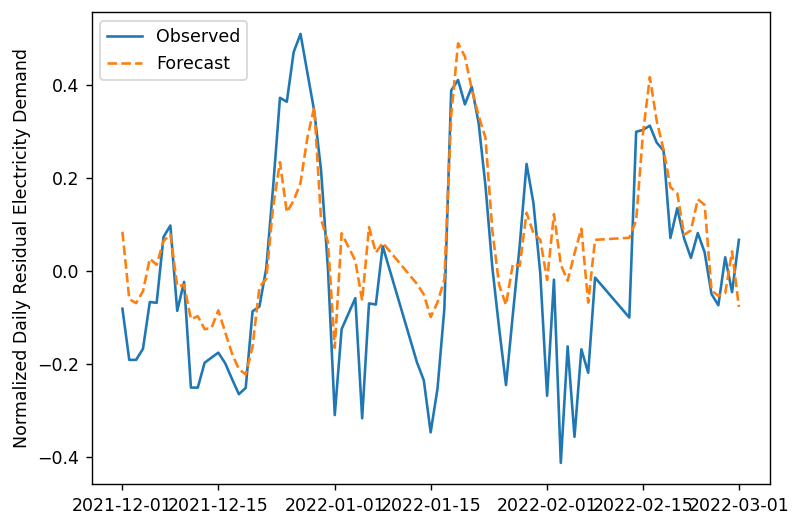

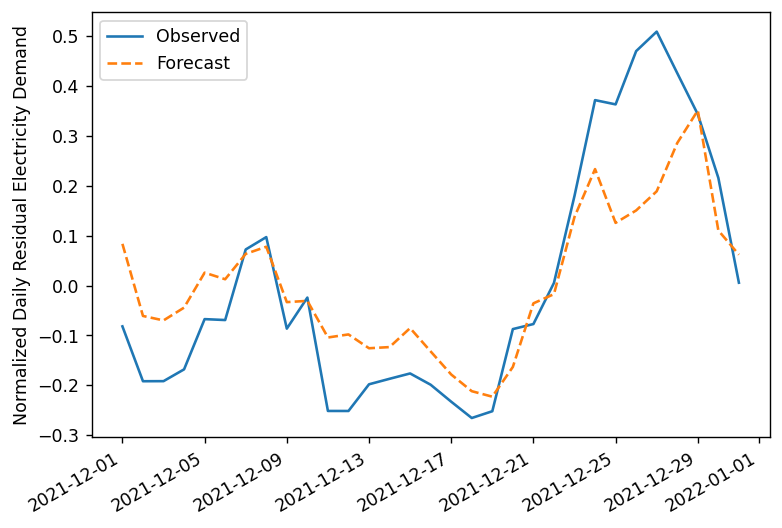

In [ ]:
# best hyperparamters
hl, a, lr, mi  = 500, 0.001, 0.0001, 10000

# train model and get predictions
mod_mlp = MLPRegressor(hidden_layer_sizes=hl, alpha=a, learning_rate_init=lr, max_iter=mi)
mod_mlp.fit(X_tr, y_tr)
pred = weekly_forecast(mod_mlp, exog_val, y_init_val)

# compute error, and plot on both long and short time scales
print('MAE:', compute_mae(y_val, pred))
plot_full(yp_full, pred, yp_val.index)
plot_week(yp_full, pred, yp_val.index)

In [ ]:
# monthly average forecasts
train_m = monthly_norm[:'2021-11-30']
test_m = monthly_norm['2021-12-01':'2022-03-01']
model_m = SARIMAX(train_m, order=best_monthly_order, seasonal_order=best_monthly_seas_order).fit()
forecast_m = model_m.get_forecast(steps=len(test_m))
pred_m_norm = pd.Series(forecast_m.predicted_mean, index=test_m.index)

# baseline hourly residual forecasts
# idx = test.index[::7]
# idx = idx.append(pd.DatetimeIndex(['2022-03-01']))
# pred_base = pd.Series(np.hstack([y_init_te, yp_te.iloc[-1]]), index=idx)
# pred_base = pred_base.resample('D').ffill().values

# hourly residual forecasts
pred_lr = weekly_forecast(mod_lr, exog_te, y_init_te)
pred_gbr = weekly_forecast(mod_gbr, exog_te, y_init_te)
pred_mlp = weekly_forecast(mod_mlp, exog_te, y_init_te)

In [ ]:
# dataframe of montly forecasts
m_norm_df = pd.DataFrame({'m_norm':pred_m_norm, 'month':pred_m_norm.index.month, 'year':pred_m_norm.index.year})

In [ ]:
lr_norm_df = pd.DataFrame({'h_norm':pred_lr, 'month':test.index.month, 'year':test.index.year})
pred_lr_norm_df = lr_norm_df.merge(m_norm_df, on=['month','year'])
pred_lr_norm = pd.Series((pred_lr_norm_df['m_norm'] + pred_lr_norm_df['h_norm']).values, index=test.index)
pred_lr = pred_lr_norm * (load_max - load_min) + load_min


# gradient boosting regression: combine monthly/hourly forecasts, unnormalize to original scale
gbr_norm_df = pd.DataFrame({'h_norm':pred_gbr, 'month':test.index.month, 'year':test.index.year})
pred_gbr_norm_df = gbr_norm_df.merge(m_norm_df, on=['month','year'])
pred_gbr_norm = pd.Series((pred_gbr_norm_df['m_norm'] + pred_gbr_norm_df['h_norm']).values, index=test.index)
pred_gbr = pred_gbr_norm * (load_max - load_min) + load_min

# multi-layer perceptron regression: combine monthly/hourly forecasts, unnormalize to original scale
mlp_norm_df = pd.DataFrame({'h_norm':pred_mlp, 'month':test.index.month, 'year':test.index.year})
pred_mlp_norm_df = mlp_norm_df.merge(m_norm_df, on=['month','year'])
pred_mlp_norm = pd.Series((pred_mlp_norm_df['m_norm'] + pred_mlp_norm_df['h_norm']).values, index=test.index)
pred_mlp = pred_mlp_norm * (load_max - load_min) + load_min

In [ ]:
print("baseline MAPE:", compute_mape(Xt_untrans2['Operational Demand (MW)'], pred_bl))
print("lin reg MAPE:", compute_mape(Xt_untrans['Operational Demand (MW)'], pred_lr))
print("grad boost reg MAPE:", compute_mape(Xt_untrans['Operational Demand (MW)'], pred_gbr))
print("MLP reg MAPE:", compute_mape(Xt_untrans['Operational Demand (MW)'], pred_mlp))

baseline MAPE: 0.1743925772681173
lin reg MAPE: 0.08009320721754754
grad boost reg MAPE: 0.05931939024044596
MLP reg MAPE: 0.0751277157743195


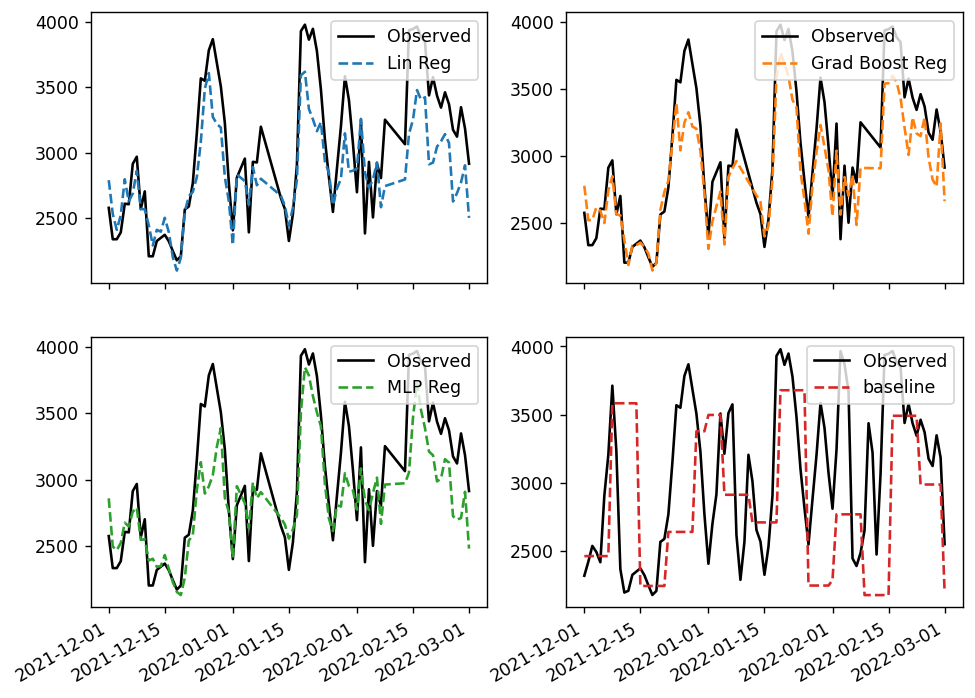

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(9,7))
ax[0,0].plot(Xt_untrans.loc['2021-12-01':'2022-03-01','Operational Demand (MW)'], label='Observed', c='k')
ax[0,0].plot(pred_lr['2021-12-01':'2022-03-01'], label='Lin Reg', ls='--', c='C0')
ax[0,0].legend(loc=1);

ax[0,1].plot(Xt_untrans.loc['2021-12-01':'2022-03-01','Operational Demand (MW)'], label='Observed', c='k')
ax[0,1].plot(pred_gbr['2021-12-01':'2022-03-01'], label='Grad Boost Reg', ls='--', c='C1')
ax[0,1].legend(loc=1);

ax[1,0].plot(Xt_untrans.loc['2021-12-01':'2022-03-01','Operational Demand (MW)'], label='Observed', c='k')
ax[1,0].plot(pred_mlp['2021-12-01':'2022-03-01'], label='MLP Reg', ls='--', c='C2')
ax[1,0].legend(loc=1);


ax[1,1].plot(Xt_untrans2.loc['2021-12-01':'2022-03-01','Operational Demand (MW)'], label='Observed', c='k')
ax[1,1].plot(pred_bl['2021-12-01':'2022-03-01'], label='baseline', ls='--', c='C3')
ax[1,1].legend(loc=1);

fig.autofmt_xdate()


In [ ]:
def bound_precision(y_actual: pd.Series, y_predicted: pd.Series, n_to_check=5):
    """
    Accepts two pandas series, and an integer n_to_check
    Series are:
    + actual values
    + predicted values
    Sorts each series by value from high to low, and cuts off each series at n_to_check
    Determines how many hits - ie how many of the indices in the actual series are in the predicted series indices
    Returns number of hits divided by n_to_check    
    """
    y_act = y_actual.copy(deep=True)
    y_pred = y_predicted.copy(deep=True)
    y_act.reset_index(drop=True, inplace=True)
    y_pred.reset_index(drop=True, inplace=True)

    act_dates =set( y_act.sort_values(ascending=False).head(n_to_check).index)
    pred_dates = set(y_pred.sort_values(ascending=False).head(n_to_check).index)
    bound_precision =  len(act_dates.intersection(pred_dates))/ n_to_check
    return bound_precision

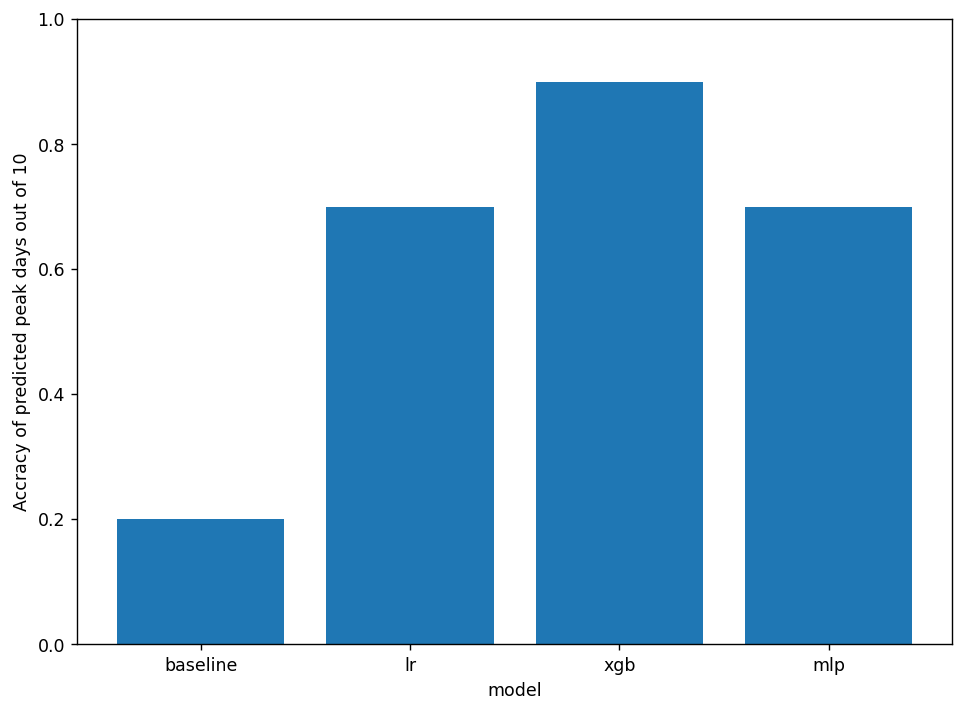

In [ ]:
n_to_check=10
base_line_pre=bound_precision(Xt_untrans2.loc['2021-12-01':'2022-03-01','Operational Demand (MW)'], pred_bl['2021-12-01':'2022-03-01'], n_to_check)
lr_pre=bound_precision(Xt_untrans.loc['2021-12-01':'2022-03-01','Operational Demand (MW)'], pred_lr['2021-12-01':'2022-03-01'], n_to_check)
gbr_pre=bound_precision(Xt_untrans.loc['2021-12-01':'2022-03-01','Operational Demand (MW)'], pred_gbr['2021-12-01':'2022-03-01'], n_to_check)
mlp_pre=bound_precision(Xt_untrans.loc['2021-12-01':'2022-03-01','Operational Demand (MW)'], pred_mlp['2021-12-01':'2022-03-01'], n_to_check)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['baseline', 'lr', 'xgb', 'mlp']
students = [base_line_pre,lr_pre,gbr_pre,mlp_pre]
ax.bar(langs,students)
plt.ylim(0 , 1)
plt.xlabel("model")
yname="Accracy of predicted peak days out of "+str(n_to_check)
plt.ylabel(yname)
plt.show()